In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ephem
%matplotlib inline

In [191]:
Tiangong = pd.read_csv('sat37820.csv', header = None)
Tiangong

,0,1,2,3,4,5,6,7,8
0,1,37820U,11053A,11272.724884,-0.000025,00000-0,00000+0,0.000000,19.0
1,2,37820,42.7802,196.477700,101297.000000,130.5581,230.4736,16.032707,40.0
2,1,37820U,11053A,11272.787316,-0.000027,85005-5,00000+0,0.000000,17.0
3,2,37820,42.7775,196.073600,115591.000000,131.6747,229.8960,16.009910,36.0
4,1,37820U,11053A,11272.860583,-0.000027,84969-5,00000+0,0.000000,21.0
...,...,...,...,...,...,...,...,...,...
14331,2,37820,42.7382,196.521900,7050.000000,335.9816,24.1336,16.456765,NaN
14332,1,37820U,11053A,18091.671591,0.058396,93439-5,12719-3,0.000000,9991.0
14333,2,37820,42.7393,196.114100,5983.000000,335.0656,24.9878,16.464305,NaN
14334,1,37820U,11053A,18091.671596,0.067025,93469-5,14209-3,0.000000,9996.0


In [192]:
Tiangong_data = Tiangong[Tiangong.index % 2 != 0].drop(0, axis = 1).drop(1, axis = 1).drop(8, axis = 1)
Tiangong_data

,2,3,4,5,6,7
1,42.7802,196.4777,101297.0,130.5581,230.4736,16.032707
3,42.7775,196.0736,115591.0,131.6747,229.8960,16.009910
5,42.7837,195.6141,110069.0,132.4039,291.9162,16.009548
7,42.7830,194.8337,111122.0,133.2177,278.3840,16.010370
9,42.7843,193.5393,110816.0,135.6714,17.3939,16.012015
...,...,...,...,...,...,...
14327,42.7386,197.7481,6718.0,339.4173,21.5137,16.435739
14329,42.7393,197.3406,6205.0,338.9313,21.1427,16.442018
14331,42.7382,196.5219,7050.0,335.9816,24.1336,16.456765
14333,42.7393,196.1141,5983.0,335.0656,24.9878,16.464305


In [193]:
Tiangong_data.columns = ['Inclination', 'RAAN', 'Eccentricity', 'AoP', 'Mean Anomaly', 'Mean Motion']
Tiangong_data

,Inclination,RAAN,Eccentricity,AoP,Mean Anomaly,Mean Motion
1,42.7802,196.4777,101297.0,130.5581,230.4736,16.032707
3,42.7775,196.0736,115591.0,131.6747,229.8960,16.009910
5,42.7837,195.6141,110069.0,132.4039,291.9162,16.009548
7,42.7830,194.8337,111122.0,133.2177,278.3840,16.010370
9,42.7843,193.5393,110816.0,135.6714,17.3939,16.012015
...,...,...,...,...,...,...
14327,42.7386,197.7481,6718.0,339.4173,21.5137,16.435739
14329,42.7393,197.3406,6205.0,338.9313,21.1427,16.442018
14331,42.7382,196.5219,7050.0,335.9816,24.1336,16.456765
14333,42.7393,196.1141,5983.0,335.0656,24.9878,16.464305


In [194]:
e = Tiangong_data.iloc[:, 2].values

for a in range(len(e)):
    if (0 < int(e[a]) < 10):
        e[a] = float('0.000000' + str(int(e[a])))
    elif (10 <= int(e[a]) < 100):
        e[a] = float('0.00000' + str(int(e[a])))
    elif (100 <= int(e[a]) < 1000):
        e[a] = float('0.0000' + str(int(e[a])))
    elif (1000 <= int(e[a]) < 10000):
        e[a] = float('0.000' + str(int(e[a])))
    elif (10000 <= int(e[a]) < 100000):
        e[a] = float('0.00' + str(int(e[a])))
    elif (100000 <= int(e[a]) < 1000000):
        e[a] = float('0.0' + str(int(e[a])))
    elif (1000000 <= int(e[a]) < 10000000):
        e[a] = float('0.' + str(int(e[a])))
    else:
        raise ValueError

In [195]:
Tiangong_data

,Inclination,RAAN,Eccentricity,AoP,Mean Anomaly,Mean Motion
1,42.7802,196.4777,0.010130,130.5581,230.4736,16.032707
3,42.7775,196.0736,0.011559,131.6747,229.8960,16.009910
5,42.7837,195.6141,0.011007,132.4039,291.9162,16.009548
7,42.7830,194.8337,0.011112,133.2177,278.3840,16.010370
9,42.7843,193.5393,0.011082,135.6714,17.3939,16.012015
...,...,...,...,...,...,...
14327,42.7386,197.7481,0.000672,339.4173,21.5137,16.435739
14329,42.7393,197.3406,0.000620,338.9313,21.1427,16.442018
14331,42.7382,196.5219,0.000705,335.9816,24.1336,16.456765
14333,42.7393,196.1141,0.000598,335.0656,24.9878,16.464305


In [196]:
Tiangong_time = Tiangong[Tiangong.index % 2 != 1][3].values.tolist()
Tiangong_time

[11272.72488377,
 11272.78731558,
 11272.860583,
 11272.98313638,
 11273.18782933,
 11273.24636762,
 11273.79990913,
 11273.8698363,
 11274.05876753,
 11274.69623924,
 11274.82625794,
 11275.14988921,
 11275.46897243,
 11275.71139266,
 11275.83520003,
 11276.16611955,
 11276.22670289,
 11276.85307632,
 11277.17632296,
 11277.46974537,
 11277.86761003,
 11278.19242971,
 11278.42030093,
 11278.81869882,
 11279.14251589,
 11279.33494229,
 11279.89932631,
 11280.09639146,
 11280.41517828,
 11280.78124752,
 11280.9275463,
 11281.04725488,
 11281.73221513,
 11281.92984881,
 11282.05573692,
 11282.55556366,
 11282.7460863,
 11282.88902778,
 11283.069988,
 11283.36232639,
 11283.83935185,
 11284.01967791,
 11284.51948589,
 11284.7033308,
 11284.90794321,
 11285.03429804,
 11285.86841435,
 11285.98332226,
 11286.27451389,
 11286.9387964,
 11286.99785079,
 11287.88542907,
 11288.17231481,
 11288.51093104,
 11288.89610993,
 11289.18646991,
 11289.85107623,
 11290.13466435,
 11290.5326194,
 11290.

In [197]:
Tiangong_time = [str(x) for x in Tiangong_time]
type(Tiangong_time[0])

str

In [198]:
Time = []
import datetime

def calc_epoch(epoch):
    # epoch year
    if (0 <= int(epoch[:2]) <= 20):
        year = int('20' + epoch[:2])
    else:
        year = int('19' + epoch[:2])
    
    epoch = epoch[2:].split('.')
    # day of year
    day_of_year = int(epoch[0]) - 1
    date = datetime.date(year, 1, 1) + datetime.timedelta(day_of_year)
    
    # extract month and day
    month = int(date.month)
    day = int(date.day)
    
    # decimal hour
    hour = int(float('0.' + epoch[1]) * 24.0)
    # decimal minute
    minute = int((float('0.' + epoch[1]) * 24.0 - hour) * 60.0)
    # decimal second
    sec = np.round(((float('0.' + epoch[1]) * 24.0 - hour) * 60.0 - minute) * 60.0, 5)
    
    Time.append([year, month, day, hour, minute, sec])
    
for i in Tiangong_time:
    calc_epoch(i)

In [199]:
Time

[[2011, 9, 29, 17, 23, 49.95773],
 [2011, 9, 29, 18, 53, 44.06611],
 [2011, 9, 29, 20, 39, 14.3712],
 [2011, 9, 29, 23, 35, 42.98323],
 [2011, 9, 30, 4, 30, 28.45411],
 [2011, 9, 30, 5, 54, 46.16237],
 [2011, 9, 30, 19, 11, 52.14883],
 [2011, 9, 30, 20, 52, 33.85632],
 [2011, 10, 1, 1, 24, 37.51459],
 [2011, 10, 1, 16, 42, 35.07034],
 [2011, 10, 1, 19, 49, 48.68602],
 [2011, 10, 2, 3, 35, 50.42774],
 [2011, 10, 2, 11, 15, 19.21795],
 [2011, 10, 2, 17, 4, 24.32582],
 [2011, 10, 2, 20, 2, 41.28259],
 [2011, 10, 3, 3, 59, 12.72912],
 [2011, 10, 3, 5, 26, 27.1297],
 [2011, 10, 3, 20, 28, 25.79405],
 [2011, 10, 4, 4, 13, 54.30374],
 [2011, 10, 4, 11, 16, 25.99997],
 [2011, 10, 4, 20, 49, 21.50659],
 [2011, 10, 5, 4, 37, 5.92694],
 [2011, 10, 5, 10, 5, 14.00035],
 [2011, 10, 5, 19, 38, 55.57805],
 [2011, 10, 6, 3, 25, 13.3729],
 [2011, 10, 6, 8, 2, 19.01386],
 [2011, 10, 6, 21, 35, 1.79318],
 [2011, 10, 7, 2, 18, 48.22214],
 [2011, 10, 7, 9, 57, 51.40339],
 [2011, 10, 7, 18, 44, 59.78573],
 

In [200]:
for i in Time:
    if(i[5] == 60.0):
        i[5] = 0

In [201]:
ts = []

for i in Time:
    ts.append(datetime.datetime(i[0], i[1], i[2], i[3], i[4], int(i[5])))

In [202]:
Tiangong_data.tail()

,Inclination,RAAN,Eccentricity,AoP,Mean Anomaly,Mean Motion
14327,42.7386,197.7481,0.000672,339.4173,21.5137,16.435739
14329,42.7393,197.3406,0.000620,338.9313,21.1427,16.442018
14331,42.7382,196.5219,0.000705,335.9816,24.1336,16.456765
14333,42.7393,196.1141,0.000598,335.0656,24.9878,16.464305
14335,42.7393,196.1141,0.000598,335.0657,25.0237,16.465606


In [203]:
for i in range(len(ts) - 1):
    if (ts[i] == ts[i + 1]):
        print("{} Index : {}".format(ts[i], i))

2012-05-07 20:22:46 Index : 757
2012-05-10 21:27:57 Index : 769
2012-06-21 14:21:46 Index : 894
2012-06-30 20:31:29 Index : 932
2012-07-17 19:51:14 Index : 990
2012-08-06 11:25:01 Index : 1059
2012-08-07 13:39:16 Index : 1063
2012-08-30 10:23:55 Index : 1147
2012-10-16 17:46:53 Index : 1304
2013-02-04 13:35:56 Index : 1629
2013-06-06 05:00:41 Index : 1988
2013-06-09 09:44:55 Index : 2001
2013-06-24 03:34:02 Index : 2074
2013-07-10 12:15:45 Index : 2138
2013-07-27 12:42:00 Index : 2194
2013-10-02 05:55:10 Index : 2398
2014-01-30 14:03:44 Index : 2761
2014-02-22 13:12:17 Index : 2828
2014-06-17 21:28:36 Index : 3160
2014-07-04 12:29:19 Index : 3207
2014-09-23 20:28:24 Index : 3444
2014-11-26 03:43:01 Index : 3626
2015-02-02 04:01:00 Index : 3823
2015-02-02 08:47:44 Index : 3825
2015-02-25 12:11:29 Index : 3888
2015-04-10 23:07:48 Index : 4015
2015-12-10 19:03:00 Index : 4721
2015-12-15 19:52:17 Index : 4737
2015-12-16 21:45:20 Index : 4741
2018-03-27 15:47:36 Index : 7136
2018-04-01 16:0

In [204]:
ts.pop(757) 
ts.pop(768) 
ts.pop(892) 
ts.pop(929) 
ts.pop(986) 
ts.pop(1054) 
ts.pop(1057) 
ts.pop(1140) 
ts.pop(1296)
ts.pop(1620) 
ts.pop(1978) 
ts.pop(1990) 
ts.pop(2062) 
ts.pop(2125) 
ts.pop(2180) 
ts.pop(2383) 
ts.pop(2745)
ts.pop(2811) 
ts.pop(3142) 
ts.pop(3188) 
ts.pop(3424) 
ts.pop(3605) 
ts.pop(3801) 
ts.pop(3802) 
ts.pop(3864)
ts.pop(3990) 
ts.pop(4695) 
ts.pop(4710) 
ts.pop(4713) 
ts.pop(7107) 
ts.pop(7136)

datetime.datetime(2018, 4, 1, 16, 7, 5)

In [205]:
interval = []
for i in range(len(ts) - 1):
    diff = ts[i + 1] - ts[i]
    interval.append(diff.days * 24 * 60 * 60 + diff.seconds)
    
interval.insert(0, 0)
interval

[0,
 5395,
 6330,
 10588,
 17686,
 5058,
 47826,
 6041,
 16324,
 55078,
 11233,
 27962,
 27569,
 20945,
 10697,
 28591,
 5235,
 54118,
 27929,
 25351,
 34376,
 28064,
 19689,
 34421,
 27978,
 16626,
 48762,
 17027,
 27543,
 31628,
 12641,
 10342,
 59181,
 17075,
 10877,
 43185,
 16461,
 12351,
 15634,
 25259,
 41214,
 15581,
 43183,
 15884,
 17679,
 10917,
 72067,
 9929,
 25159,
 57394,
 5102,
 76687,
 24786,
 29257,
 33279,
 25088,
 57421,
 24502,
 34384,
 28608,
 24576,
 28410,
 18745,
 10349,
 24623,
 23602,
 44394,
 25238,
 33712,
 17952,
 5076,
 25163,
 33836,
 23477,
 5123,
 25375,
 38097,
 13159,
 5272,
 25380,
 34352,
 27848,
 25155,
 33575,
 18084,
 5069,
 25219,
 34432,
 27907,
 37556,
 22097,
 22253,
 37510,
 22067,
 20461,
 7549,
 43187,
 20341,
 18354,
 19655,
 45822,
 38813,
 31316,
 33851,
 43152,
 39315,
 30398,
 39991,
 42010,
 12030,
 72637,
 2884,
 17708,
 5599,
 16591,
 16571,
 25155,
 51443,
 30377,
 5708,
 82027,
 34351,
 53136,
 82046,
 12092,
 21388,
 7602,
 160

In [206]:
idx = pd.to_datetime(ts)
idx

DatetimeIndex(['2011-09-29 17:23:49', '2011-09-29 18:53:44',
               '2011-09-29 20:39:14', '2011-09-29 23:35:42',
               '2011-09-30 04:30:28', '2011-09-30 05:54:46',
               '2011-09-30 19:11:52', '2011-09-30 20:52:33',
               '2011-10-01 01:24:37', '2011-10-01 16:42:35',
               ...
               '2018-03-31 07:58:38', '2018-03-31 12:22:08',
               '2018-03-31 13:49:59', '2018-03-31 15:17:46',
               '2018-03-31 18:13:20', '2018-04-01 00:04:22',
               '2018-04-01 10:17:36', '2018-04-01 11:44:52',
               '2018-04-01 14:39:44', '2018-04-01 16:07:05'],
              dtype='datetime64[ns]', length=7137, freq=None)

In [209]:
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[757], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[768], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[892], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[929], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[986], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[1054], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[1057], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[1140], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[1296], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[1620], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[1978], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[1990], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[2062], axis = 0)
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[2125], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[2180], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[2383], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[2745], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[2811], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[3142], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[3188], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[3424], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[3605], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[3801], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[3802], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[3864], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[3990], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[4695], axis = 0)
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[4710], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[4713], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[7107], axis = 0) 
Tiangong_data = Tiangong_data.drop(Tiangong_data.index[7136], axis = 0) 

In [210]:
Tiangong_data.index = idx
Tiangong_data

,Inclination,RAAN,Eccentricity,AoP,Mean Anomaly,Mean Motion
2011-09-29 17:23:49,42.7802,196.4777,0.010130,130.5581,230.4736,16.032707
2011-09-29 18:53:44,42.7775,196.0736,0.011559,131.6747,229.8960,16.009910
2011-09-29 20:39:14,42.7837,195.6141,0.011007,132.4039,291.9162,16.009548
2011-09-29 23:35:42,42.7830,194.8337,0.011112,133.2177,278.3840,16.010370
2011-09-30 04:30:28,42.7843,193.5393,0.011082,135.6714,17.3939,16.012015
...,...,...,...,...,...,...
2018-04-01 00:04:22,42.7428,200.6065,0.000747,347.8126,12.9725,16.400048
2018-04-01 10:17:36,42.7386,197.7481,0.000672,339.4173,21.5137,16.435739
2018-04-01 11:44:52,42.7393,197.3406,0.000620,338.9313,21.1427,16.442018
2018-04-01 14:39:44,42.7382,196.5219,0.000705,335.9816,24.1336,16.456765


In [215]:
interval = pd.DataFrame(interval, columns = ["Interval"])
interval.index = idx
interval

,Interval
2011-09-29 17:23:49,0
2011-09-29 18:53:44,5395
2011-09-29 20:39:14,6330
2011-09-29 23:35:42,10588
2011-09-30 04:30:28,17686
...,...
2018-04-01 00:04:22,21062
2018-04-01 10:17:36,36794
2018-04-01 11:44:52,5236
2018-04-01 14:39:44,10492


In [224]:
Tiangong = pd.concat([Tiangong_data, interval], axis = 1)

In [227]:
Tiangong

,Inclination,RAAN,Eccentricity,AoP,Mean Anomaly,Mean Motion,Interval
2011-09-29 17:23:49,42.7802,196.4777,0.010130,130.5581,230.4736,16.032707,0
2011-09-29 18:53:44,42.7775,196.0736,0.011559,131.6747,229.8960,16.009910,5395
2011-09-29 20:39:14,42.7837,195.6141,0.011007,132.4039,291.9162,16.009548,6330
2011-09-29 23:35:42,42.7830,194.8337,0.011112,133.2177,278.3840,16.010370,10588
2011-09-30 04:30:28,42.7843,193.5393,0.011082,135.6714,17.3939,16.012015,17686
...,...,...,...,...,...,...,...
2018-04-01 00:04:22,42.7428,200.6065,0.000747,347.8126,12.9725,16.400048,21062
2018-04-01 10:17:36,42.7386,197.7481,0.000672,339.4173,21.5137,16.435739,36794
2018-04-01 11:44:52,42.7393,197.3406,0.000620,338.9313,21.1427,16.442018,5236
2018-04-01 14:39:44,42.7382,196.5219,0.000705,335.9816,24.1336,16.456765,10492


In [2]:
T = pd.read_csv('Tiangong.csv', parse_dates = [0], index_col = 0)
T

,Inclination,RAAN,Eccentricity,AoP,Mean Anomaly,Mean Motion,Interval
2011-09-29 17:23:49,42.7802,196.4777,0.010130,130.5581,230.4736,16.032707,0
2011-09-29 18:53:44,42.7775,196.0736,0.011559,131.6747,229.8960,16.009910,5395
2011-09-29 20:39:14,42.7837,195.6141,0.011007,132.4039,291.9162,16.009548,6330
2011-09-29 23:35:42,42.7830,194.8337,0.011112,133.2177,278.3840,16.010370,10588
2011-09-30 04:30:28,42.7843,193.5393,0.011082,135.6714,17.3939,16.012015,17686
...,...,...,...,...,...,...,...
2018-04-01 00:04:22,42.7428,200.6065,0.000747,347.8126,12.9725,16.400048,21062
2018-04-01 10:17:36,42.7386,197.7481,0.000672,339.4173,21.5137,16.435739,36794
2018-04-01 11:44:52,42.7393,197.3406,0.000620,338.9313,21.1427,16.442018,5236
2018-04-01 14:39:44,42.7382,196.5219,0.000705,335.9816,24.1336,16.456765,10492


In [3]:
x = T['Mean Anomaly'].values
x

array([230.4736, 229.896 , 291.9162, ...,  21.1427,  24.1336,  25.0237])

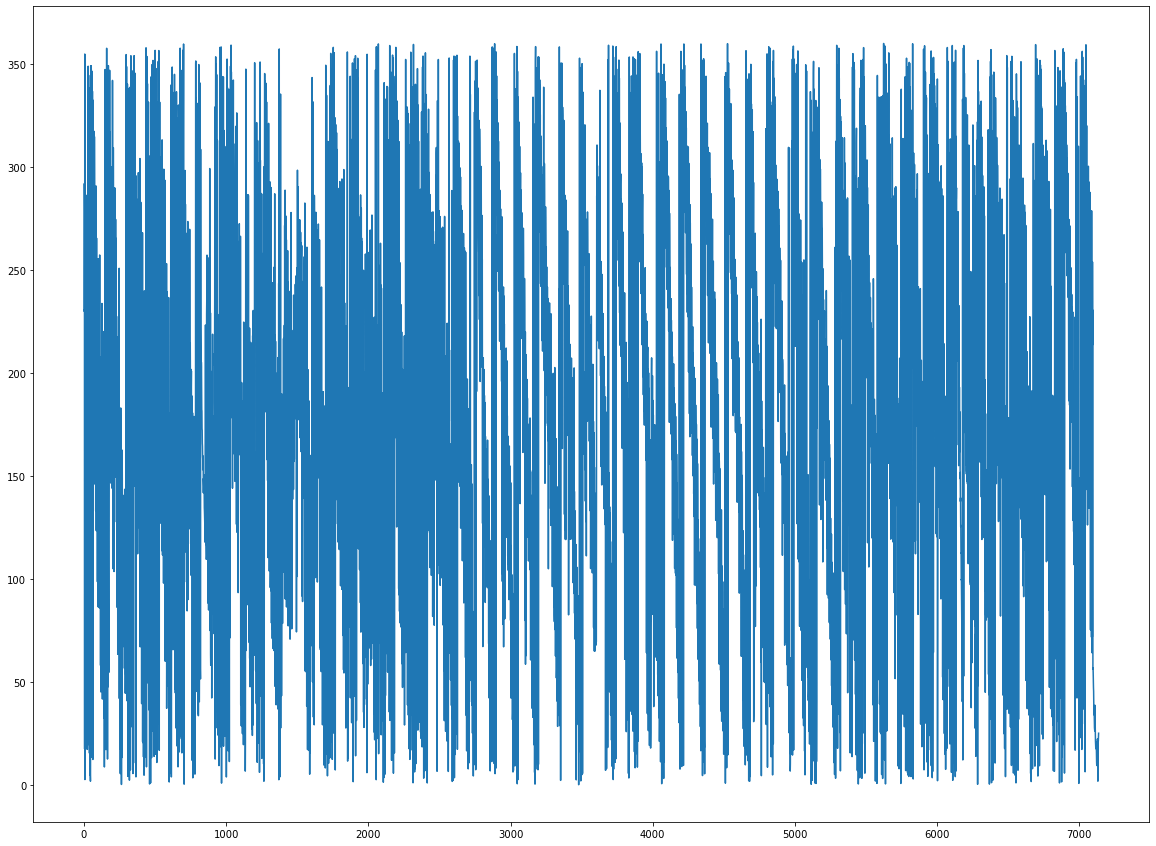

In [4]:
plt.figure(figsize = (20, 15))
plt.plot(x)

In [29]:
idx = []

for i in range(len(x) - 1):
    if(abs(x[i + 1] - x[i]) > 100):
        idx.append(i)
        
print(len(idx))

2236


In [5]:
'''
x = x.values
for a in range(7096, 7137):
    if (True):
        x[a] = x[a] - 360 * 2237
        
for a in range(len(x)):
    for c in range(len(idx) - 1):  
        if ((idx[c]+1) <= a and a < (idx[c+1]+1)):
            x[a] = x[a] + 360 * (c+1)
            '''
for a in range(len(x)):
    x[a] = x[a] + 360 * (a+1)

In [58]:
type(x)

pandas.core.frame.DataFrame

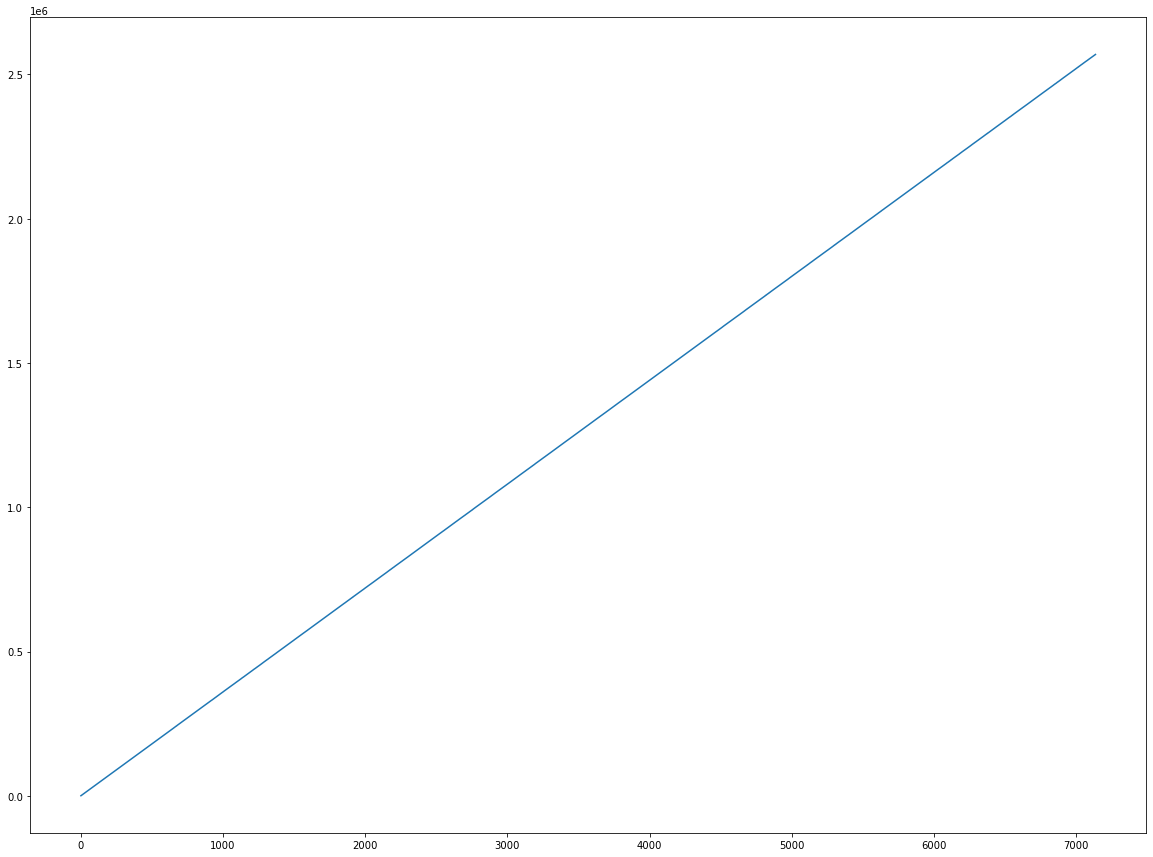

In [6]:
plt.figure(figsize = (20, 15))
plt.plot(x)

In [7]:
type(x)

numpy.ndarray

In [7]:
x = pd.DataFrame(x)
x.to_csv('xz.csv')

In [9]:
2447212.9758 % 360

292.97580000013113